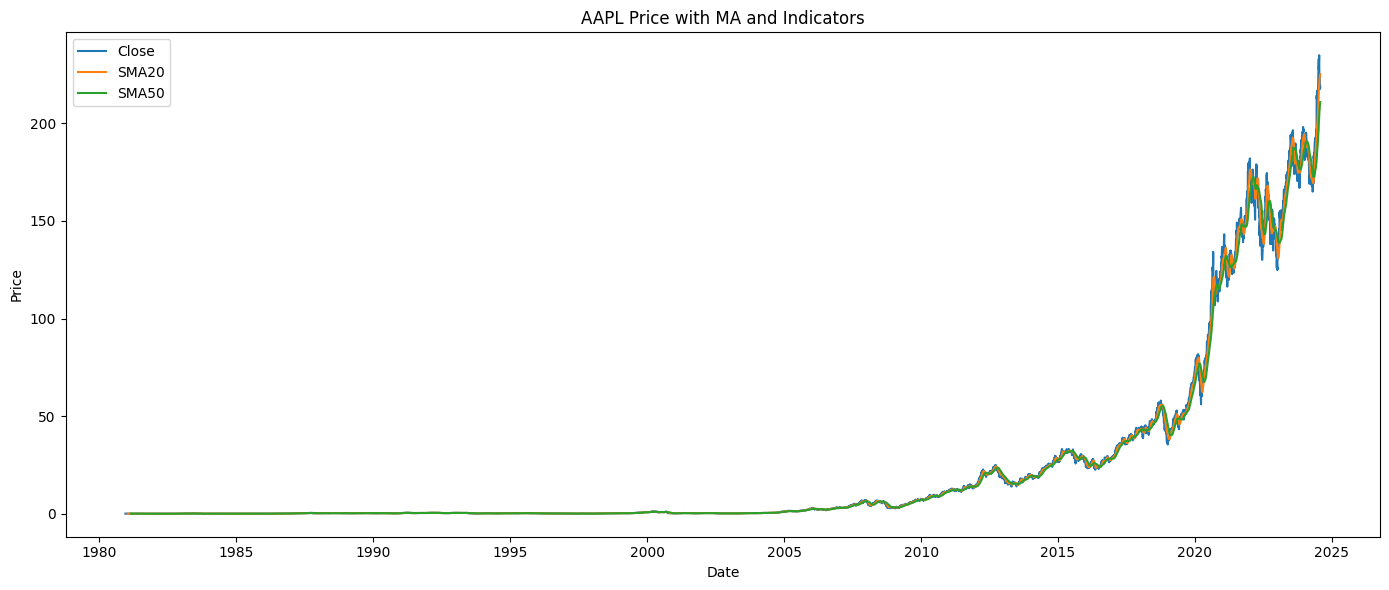

        date   returns
1 1980-12-15 -0.052171
2 1980-12-16 -0.073398
3 1980-12-17  0.024751
4 1980-12-18  0.028992
5 1980-12-19  0.061029


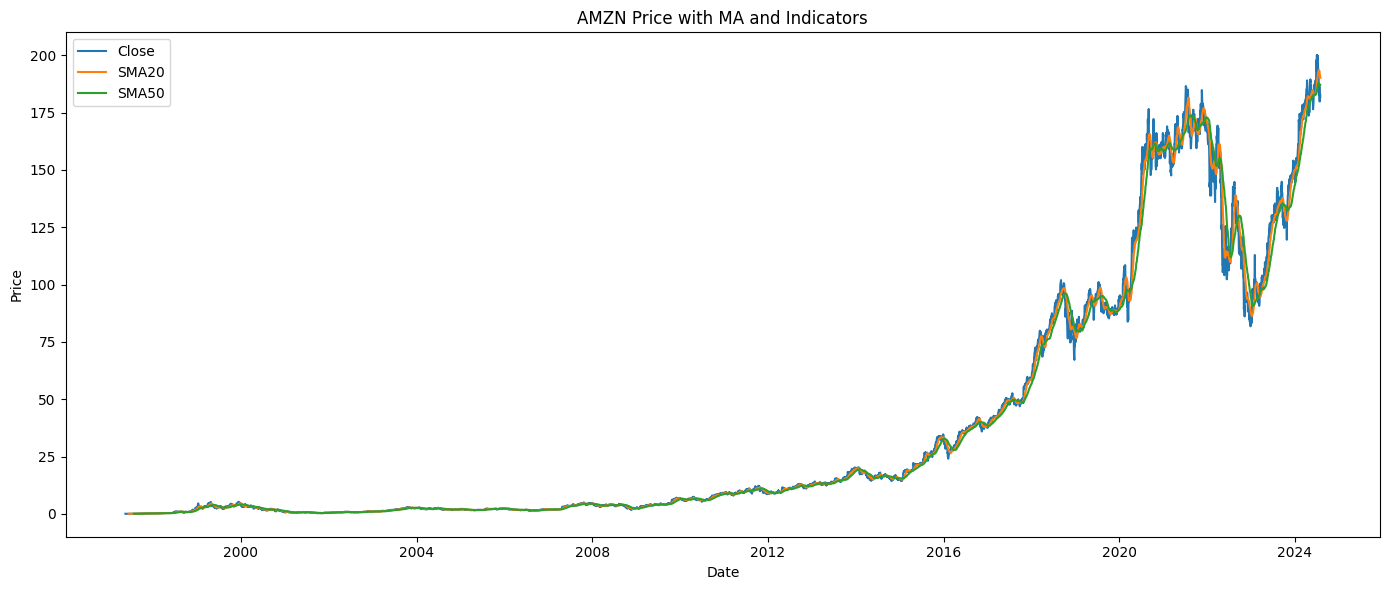

        date   returns
1 1997-05-16 -0.117028
2 1997-05-19 -0.012040
3 1997-05-20 -0.042685
4 1997-05-21 -0.127392
5 1997-05-22 -0.021891


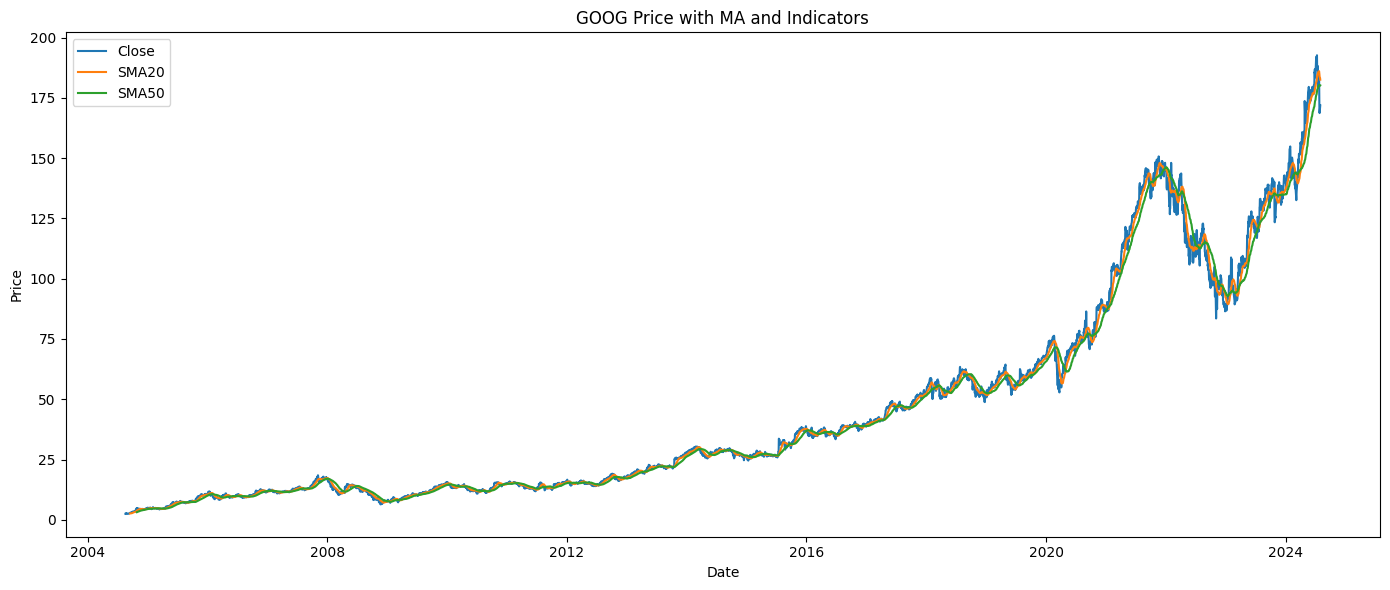

        date   returns
1 2004-08-20  0.079430
2 2004-08-23  0.010064
3 2004-08-24 -0.041408
4 2004-08-25  0.010775
5 2004-08-26  0.018019


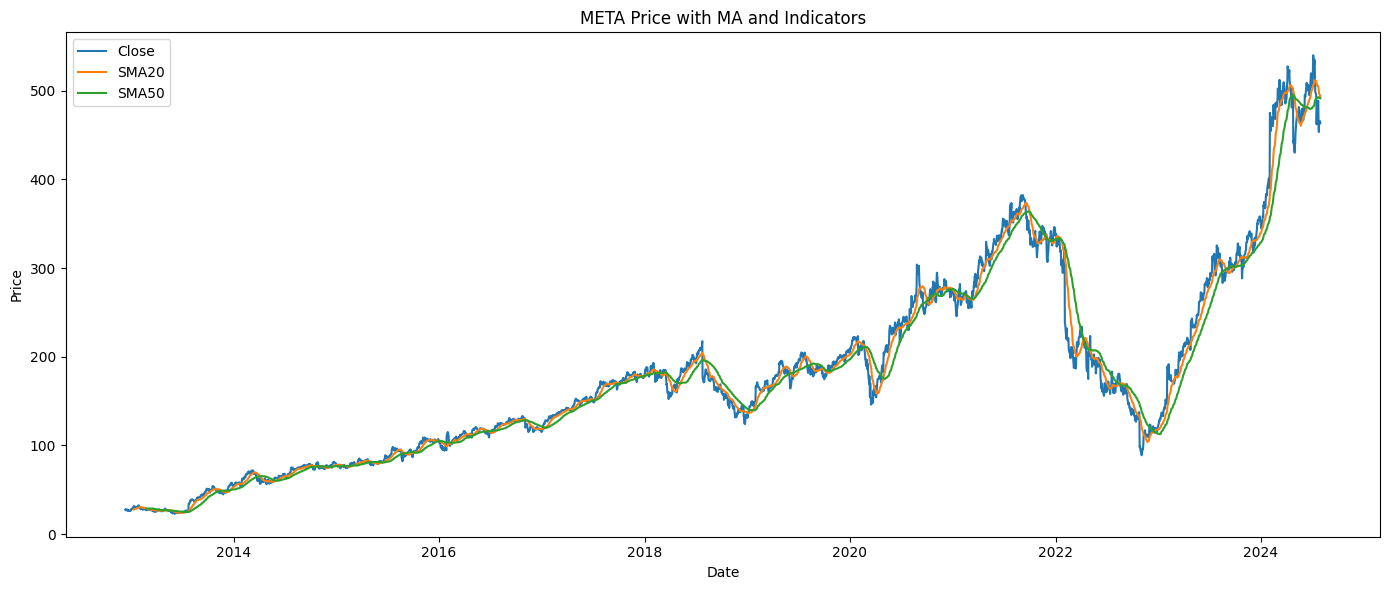

        date   returns
1 2012-12-13  0.023930
2 2012-12-14 -0.050637
3 2012-12-17 -0.002238
4 2012-12-18  0.035888
5 2012-12-19 -0.010826


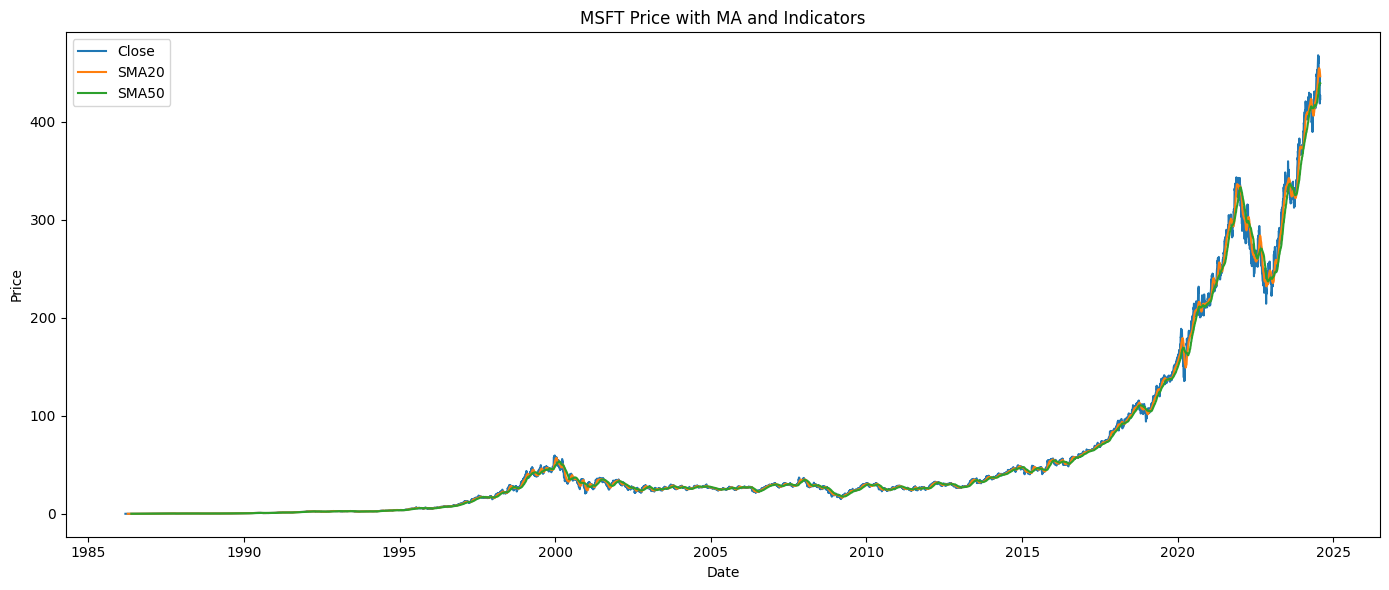

        date   returns
1 1986-03-14  0.035712
2 1986-03-17  0.017250
3 1986-03-18 -0.025432
4 1986-03-19 -0.017390
5 1986-03-20 -0.026547


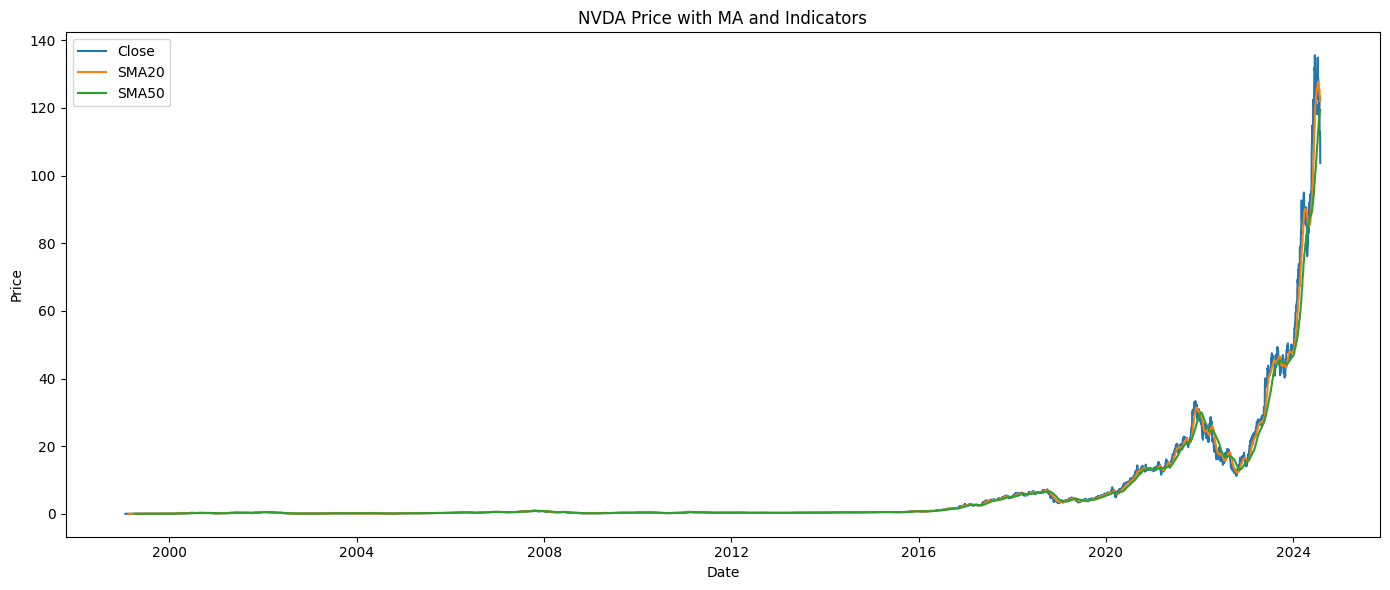

        date   returns
1 1999-01-25  0.104764
2 1999-01-26 -0.077594
3 1999-01-27 -0.003110
4 1999-01-28 -0.003144
5 1999-01-29 -0.047019


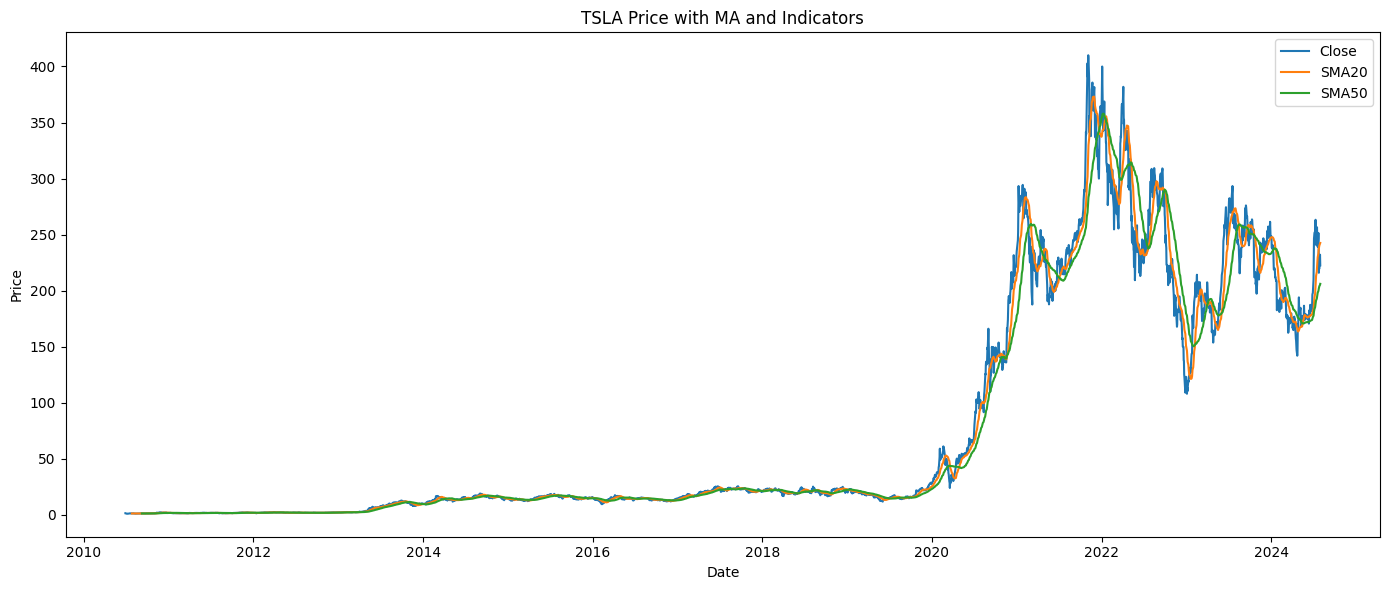

        date   returns
1 2010-06-30 -0.002511
2 2010-07-01 -0.078473
3 2010-07-02 -0.125683
4 2010-07-06 -0.160937
5 2010-07-07 -0.019243


In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))

from scripts.load_data import load_stock_data
from scripts.indicators.moving_averages import add_moving_averages
from scripts.indicators.rsi import add_rsi
from scripts.indicators.macd import add_macd
from scripts.indicators.plot_stock_indicators import plot_price_with_indicators
from scripts.pynance_metrics import get_returns

tickers = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "TSLA"]

for ticker in tickers:
    try:
        stock_df = load_stock_data(ticker)
        stock_df = add_moving_averages(stock_df)
        stock_df = add_rsi(stock_df)
        stock_df = add_macd(stock_df)
        plot_price_with_indicators(stock_df, title=f"{ticker} Price with MA and Indicators")

        returns_df = get_returns(stock_df)
        print(returns_df.head())


    except Exception as e:
        print(f"Error processing {ticker}: {e}")

